<a href="https://colab.research.google.com/github/AteBraak/ML-Examples/blob/main/PyTorch/ML/DatasetsExtraction_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import random
import torch

manualSeed = 1234
use_gpu = torch.cuda.is_available()

# Fixing random seed
random.seed(manualSeed)
np.random.seed(manualSeed)
torch.manual_seed(manualSeed)
if use_gpu:
   torch.cuda.manual_seed_all(manualSeed)

# **Bench Mark DataSets**

## **Image**

### **MNIST**


Snippet taken from IVADO-Mila Deep Learning School Spring 2021
Type: image
28 x 28
n= 70000
Description: Hand written numbers 0-9

In [2]:
from torch.utils.data import sampler, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

class ChunkSampler(sampler.Sampler):
    """Samples elements sequentially from some offset.
    From: https://github.com/pytorch/vision/issues/168
    
    Parameters
    ----------
    num_samples: int
      # of desired datapoints
    start: int
      Offset where we should start selecting from
    """
    def __init__(self, num_samples, start=0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples


train_dataset = MNIST(root='../data', 
                      train=True, 
                      transform=transforms.ToTensor(),  
                      download=True)

test_dataset = MNIST(root='../data', 
                     train=False, 
                     transform=transforms.ToTensor())

train_dataset_sizes = len(train_dataset)
num_train_samples = int(0.8 * train_dataset_sizes)
num_valid_samples = train_dataset_sizes - num_train_samples
num_test_samples = len(test_dataset)

print('# of train examples: {}'.format(num_train_samples))
print('# of valid examples: {}'.format(num_valid_samples))
print('# of test examples: {}'.format(num_test_samples))

batch_size = 128

train_loader = DataLoader(dataset=train_dataset,
                          sampler=ChunkSampler(num_train_samples, 0),
                          batch_size=batch_size, 
                          shuffle=False)

valid_loader = DataLoader(dataset=train_dataset,
                          sampler=ChunkSampler(
                              num_valid_samples, num_train_samples),
                          batch_size=batch_size, 
                          shuffle=False)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!
# of train examples: 48000
# of valid examples: 12000
# of test examples: 10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


To Visualize

Inputs size: torch.Size([128, 1, 28, 28])
Classes size: torch.Size([128])


Display a random image:


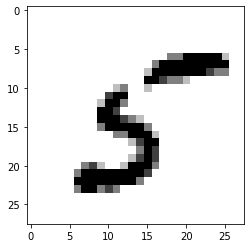

Label associated: 5


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

inputs, labels = next(iter(train_loader))

print('Inputs size: {}'.format(inputs.size()))
print('Classes size: {}'.format(labels.size()))

# Pick a random image of the batch
idx = np.random.randint(len(inputs))
img = 255 - inputs[idx] * 255

# Plot the image
print('\n\nDisplay a random image:')
img_np = img.numpy()[0, :, :] # Discard the channel dimension
plt.imshow(img_np, cmap='gray', vmin=0, vmax=255)
plt.grid(False)
plt.show()

# display the associated label
print(f"Label associated: {labels[idx]}")

### **CIFAR10 Dataset** 

In [6]:
import importlib
required_libraries = ['torch', 'torchvision', 'PIL', 'matplotlib', 'numpy']
for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        print("%s unavailable" % lib)

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [8]:
def download_CIFAR10(path, train_flag):
  """
  Args:
     path: the directory where the dowloaded dataset will be saved.
     train_flag: if `True`, download data from training set, otherwise
        download from test set.
        
  Return:
     A tuple of two elements (imgs, labels) where
        imgs: a numpy array of shape N x 32 x 32 x 3 where N is the number of images.
        labels: list of N (indexed-)classes, each  associated with a single image.
  
  """
  dataset = torchvision.datasets.CIFAR10(
      root=path, train=train_flag, download=True
  )
  imgs, labels = dataset.data, dataset.targets
  return imgs, labels


In [9]:
imgs, labels = download_CIFAR10('/', train_flag = True)
test_imgs, test_labels = download_CIFAR10('/', train_flag = False)


Extracting /cifar-10-python.tar.gz to /
Files already downloaded and verified


In [10]:
def partition_dataset(imgs, labels, valid_ratio=0.3, shuffle=True, seed=1234):
  """
  Args:
     imgs: numpy array representing the image set from which 
        the partitioning is made.
     labels: the labels associated with the provided images.
     valid_ratio (optional): the proportion of the data that will be used in
        the validation set. Default: 0.3.
     shuffle (optional): whether or not to shuffle the data. Default: True.
     seed (optional): the seed of the numpy random generator: Default: 1234.
        
  Return:
     A tuple of 4 elements (train_imgs, train_labels, valid_imgs, valid_labels)
     where:
        train_imgs: a numpy array of images for the training set.
        train_labels: labels associated with the images in the training set.
        valid_imgs: a numpy array of images for the validation set.
        valid_labels: labels associated with the images in the validation set.
  
  """
  if shuffle:
    np.random.seed(seed)  # Set the random seed of numpy.
    indices = np.random.permutation(imgs.shape[0])
  else:
    indices = np.arange(imgs.shape[0])
  
  train_idx, valid_idx = np.split(
      indices, 
      [int((1.0 - valid_ratio)*len(indices))]
  )
  train_imgs, valid_imgs = imgs[train_idx], imgs[valid_idx]
  labels = np.array(labels)
  train_labels, valid_labels = labels[train_idx].tolist(), labels[valid_idx].tolist()
  return train_imgs, train_labels, valid_imgs, valid_labels

In [11]:
train_imgs, train_labels, valid_imgs, valid_labels = partition_dataset(imgs, labels)

**To Visualize**

In [12]:
import matplotlib.pyplot as plt


def plot_image(img):
  """
  Plot a single image.
  
  Args:
     img: image to be plotted.
     
  """
  plt.imshow(img)
  plt.show()

  
def plot_random_images(imgs, n):  
  """
  Randomly sample n images from an image set and plot them in a grid.
  
  Args:
     imgs: collection of images from which sampling will be made.
     n: the number of images to be sampled.
     
  """
  sampled_indices = np.random.choice(imgs.shape[0], n, False)
  sampled_images = imgs[sampled_indices]
  
  sampled_images = np.transpose(sampled_images, (0, 3, 1, 2))
  sampled_tensor = torch.Tensor(sampled_images)
  
  grid_tensor = torchvision.utils.make_grid(
      sampled_tensor, normalize=True, value_range=(0, 255)
  )
  grid_tensor = np.transpose(grid_tensor.numpy(), (1, 2, 0))
  
  plot_image(grid_tensor)
  
  
def plot_dataset_histogram(labels, title='Label distribution', rel_freq=False):
  """
  Plot the histogram/distribution of the labels within a dataset.
  
  Args:
     labels: collection of labels from which the distribution is computed.
     title: the title of the histogram.
     rel_freq: if true, the histogram is normalized to show relative frequencies
               otherwise, it shows the frequencies.
     
  """
  _ = plt.hist(labels, bins=np.arange(11)-0.5, rwidth=0.85, density=rel_freq)
  plt.title(title)
  plt.xlabel('Label')
  if rel_freq:
    plt.ylabel('Relative frequency')
  else:
    plt.ylabel('Frequency')
  plt.xticks(np.arange(10))
  plt.show()

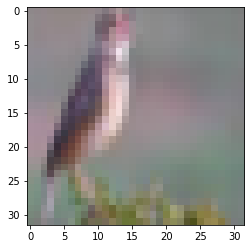

label:  2


In [13]:
# plot a given sample from the training dataset and retrieve its label
i=0
plot_image(train_imgs[i])
print("label: ", train_labels[i])

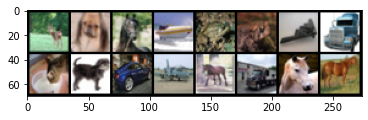

In [14]:
# plot random samples (e.g. 16) from the training dataset
plot_random_images(train_imgs, 16)

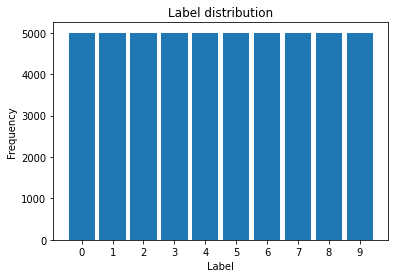

In [15]:
# plot the label distribution of the training dataset
plot_dataset_histogram(labels, title='Label distribution', rel_freq=False)

In [16]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader

def create_dataset(images, labels, n):
  """
  Slice the first n images/labels and create a torch.utils.data.DataLoader.
  
  Args:
     images: numpy array of images.
     labels: list of labels associated with the images.
     n: the number of images/labels to slice.
        
  Return:
     A torch.utils.data.TensorDataset to be used with a torch.utils.data.DataLoader.
     
  """
  imgs = torch.tensor(images[:n], dtype=torch.float)
  labels = torch.tensor(labels[:n], dtype=torch.long)
  dataset = TensorDataset(imgs, labels)
  return dataset


n = 100
batch_size = 32
train_dataset = create_dataset(train_imgs, train_labels, n)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, drop_last=False, shuffle=True)

# **Toy DataSets**

## **Titanic Survival Dataset**
Source: IVADO-Mila Deep Learning School Spring 2021
Type: csv
Description: Categorical and numerical records of passengers of the Titanic

In [1]:
import importlib
required_libraries = ['torch', 'torchvision', 'PIL', 'matplotlib', 
                      'numpy', 'pandas']
for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        print("%s unavailable" % lib)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import numpy as np
import pandas as pd
#import torchvision

from torch.utils.data import TensorDataset

In [33]:
titanic_df = pd.read_csv(
    'https://github.com/afansi/winterschool18/blob/master/titanic3.csv?raw=true', 
    sep='\t', 
    index_col=None, 
    na_values=['NA']
)

In [34]:
# a snapshot of the first 5 data points
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
titanic_df.drop(['name', 'ticket', 'cabin', 'home.dest', 'boat', 'body'], axis=1, inplace=True)

In [36]:
titanic_preprocess_df = pd.get_dummies(data=titanic_df, columns=['pclass', 'sex', 'embarked'])
titanic_preprocess_df.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,0,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,0,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,0,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1


In [29]:
titanic_preprocess_df.loc[titanic_preprocess_df[['sex_male','sex_female']].sum(axis=1) != 1]

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S


In [30]:
titanic_preprocess_df.loc[titanic_preprocess_df[['pclass_1','pclass_2', 'pclass_3']].sum(axis=1) != 1]

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S


In [37]:
titanic_preprocess_df.loc[titanic_preprocess_df[['embarked_C','embarked_Q', 'embarked_S']].sum(axis=1) != 1]

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
168,1,38.0,0,0,80.0,1,0,0,1,0,0,0,0
284,1,62.0,0,0,80.0,1,0,0,1,0,0,0,0


In [38]:
n_examples = len(titanic_preprocess_df)
titanic_preprocess_df = titanic_preprocess_df.dropna(axis=0, how='any').reset_index(drop=True)
print(f'We removed {n_examples-len(titanic_preprocess_df)} examples over {n_examples} containing missing values.')

We removed 264 examples over 1309 containing missing values.


In [39]:
# Drop rows where there is no port of embarkation associated
titanic_preprocess_df = titanic_preprocess_df.drop(index=148).reset_index(drop=True)
titanic_preprocess_df = titanic_preprocess_df.drop(index=248).reset_index(drop=True)

In [40]:
titanic_preprocess_df.loc[titanic_preprocess_df[['embarked_C','embarked_Q', 'embarked_S']].sum(axis=1) != 1]

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S


In [41]:
print(f'There are {len(titanic_preprocess_df)} remaining examples in the dataset.')

There are 1043 remaining examples in the dataset.


In [46]:
train, validate, test = np.split(
    titanic_preprocess_df.sample(frac=1, random_state=manualSeed), 
    [int(.6*len(titanic_preprocess_df)), int(.8*len(titanic_preprocess_df))])

# Remove the label column from X and create a label vectors.
X_train = train.drop(['survived'], axis=1).to_numpy()
y_train = train['survived'].to_numpy()

X_val = validate.drop(['survived'], axis=1).to_numpy()
y_val = validate['survived'].to_numpy()

X_test = test.drop(['survived'], axis=1).to_numpy()
y_test = test['survived'].to_numpy()

In [47]:
train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

# **Generated DataSets**

## **Generated Polygon Dataset**  
Snippet taken from IVADO-Mila Deep Learning School Spring 2021

In [1]:
!pip install --upgrade pillow

Requirement already up-to-date: pillow in /usr/local/lib/python3.7/dist-packages (8.2.0)


In [13]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
import os  #to apply font
from torch.utils.data import Dataset
from PIL import Image, ImageDraw, ImageFont

In [22]:
def display_image_and_boxes(image, target=None, category_names=None):
    ''' 
    image: tensor
    target: dict
    category_names: list mapping class label (int) to class name (str)
    
    '''

    # Convert tensor to image and draw it.
    np_img = (image.permute(1,2,0).cpu().numpy() * 255).astype('uint8')
    im = Image.fromarray(np_img)
    draw = ImageDraw.Draw(im)

    if target:
        # Make sure the required font is available
        if not os.path.isfile('Roboto-Regular.ttf'):
            !wget https://github.com/jerpint/ivado-mila-dl-school-2019-vancouver/raw/dlschool21/assests/Roboto-Regular.ttf
        font = ImageFont.truetype(font='Roboto-Regular.ttf', size=16)

        # Draw each bounding box in the target
        for box, label in zip(target['boxes'], target['labels']):
            box = box.detach().cpu().numpy()
            draw.rectangle(box, outline='black')
            label_str =  category_names[label.cpu().numpy()] if category_names else str(label.cpu().numpy()+2)
            draw.text((box[0], box[1]), label_str, fill=(0,128,256,256), font=font)
    return im

def display_masks(image, predictions, category_names=None):
    ''' 
    image: tensor
    predictions: dict
    category_names: list mapping class label (int) to class name (str)
    
    '''
    font = ImageFont.truetype(font='Roboto-Regular.ttf', size=16)
    mask_arr = np.zeros((256, 300))
    im = Image.fromarray(mask_arr)
    draw = ImageDraw.Draw(im)
    for box, label, mask in zip(predictions['boxes'], predictions['labels'], predictions['masks']):
        mask = mask.detach().cpu().numpy().squeeze()
        mask_arr += mask
        box = box.detach().cpu().numpy()
        draw.rectangle(box, outline='black')
        label_str =  category_names[label.cpu().numpy()] if category_names else str(label.cpu().numpy()+2)
        draw.text(((box[0] + box[2])/2, (box[1]+box[3])/2), label_str, fill=1, font=font)
    mask_arr = (mask_arr > 0.5) * 255
    im_with_mask = Image.fromarray( (np.array(im) + mask_arr).astype('uint8') )
    return im_with_mask


def URL_to_tensor(URL):
    '''
    Convert an image URL to a pytorch tensor.

    Reorders the image axes so that channel is the first dimension and normalizes 
    channels to be in range [0,1].

    input
    -----
    URL (str): URL of the image to be processed

    returns
    -------
    img_tensor (list): list containing the image as a torch.tensor()
    '''
    
    img = Image.open(urlopen(URL)) # Load image
    img_tensor = torch.as_tensor(np.array(img) / 255) # Normalize input to [0, 1]
    img_tensor = img_tensor.permute(2, 0, 1).float() # Reorder image axes to channel first
    return [img_tensor]

In [15]:
class Polygons(Dataset):
  
    def __init__(self, 
                 im_width, 
                 im_height, 
                 dataset_len=100, 
                 max_polygon_size=6,
                 max_polygons_per_image=8,
                 split='train',
                 background=False):
        self.width = im_width
        self.height = im_height
        self.max_polygon_side=max_polygon_size
        self.dataset_len = dataset_len
        self.max_polygons_per_image = max_polygons_per_image
        self.split = split
        self.background = background
        self.set_offset()

    def set_offset(self):
        '''The offset determines where the random seed index begins. 

        this ensures reproducibility accross runs.
        '''
        if self.split == 'train':
            self.offset = 0
        elif self.split == 'val':
            self.offset = dataset_len
        elif self.split == 'test':
            self.offset = 2 * dataset_len
        else:
            raise ValueError("split has to be one of 'train', 'test', 'val'")

    def draw_polygon(self):
        '''
        Draws a single polygon.
        
        returns:
        bbox: coordinates of the bounding box [xmin, ymin, xmax, ymax]
        mask: Mask of the polygon, non-zero values where there is a polygon
        label: the number of sides associated to the polygon
        '''
        img = Image.new('L', (self.width, self.height), 0)
        n_sides = random.randint(3, self.max_polygon_side)
        circle_x = random.randint(10, self.width-10)
        circle_y = random.randint(10, self.height-10)
        circle_r = random.randint(10, 60)
        bounding_circle = (circle_x, circle_y, circle_r)
        rotation = random.randint(0, 360)
        ImageDraw.Draw(img).regular_polygon(bounding_circle=bounding_circle, n_sides=n_sides, rotation=rotation, fill=1, outline=None)
        mask = np.array(img) 
        bbox = self.mask_to_bbox(mask)
        label = n_sides - 2 # labels should be in range (1 ... N)
        return bbox, mask, label

    def add_random_background(self, img, seed=None):
        '''
        Add a random background to an existing image using gadients. 
        Adapted from: https://python-catalin.blogspot.com/2013/10/how-to-make-color-gradient-and-images.html

        img: Original image with white background
        img_with_bg: New image with a random background added to it
        '''

        if seed:
            random.seed(seed)
        bg = Image.new("RGB", (self.width, self.height), "#FFFFFF")
        draw = ImageDraw.Draw(bg)

        # create the background
        r,g,b = random.randint(0,255), random.randint(0,255), random.randint(0,255)
        dr = (random.randint(0, 255) - r) / self.width
        dg = (random.randint(0, 255) - g) / self.width
        db = (random.randint(0, 255) - b) / self.width
        for i in range(self.width):
            r, g, b = r + dr, g + dg, b + db
            draw.line((i, 0 , i, self.width), fill=(int(r), int(g), int(b)))
          
        # Add it to the original image
        bg_array, img_array = np.array(bg), np.array(img)
        bg_mask = np.zeros(bg_array.shape)
        bg_mask[np.where(img_array == 255)] = 1
        img_with_bg = Image.fromarray((img_array + bg_mask * bg_array).astype('uint8'))
        
        return img_with_bg
    
    def array_to_img(self, array):
        '''Convert the numpy array data to an PIL image object.
        i.e. 3 color channels [0, 255]
        

        inputs:
        array: np.array

        returns:
        PIL.Image
        '''
        cm = plt.get_cmap('cubehelix') # Use a colormap for mapping int to colour
        colored_image = cm(1 - array / 255)
        return Image.fromarray((colored_image[:, :, :3] * 255).astype(np.uint8))

    def img_to_tensor(self, img):
        '''
        convert a pil image to torch tensor.
        Must scale values to be in range 0-1. Must return a float() tensor
        reorder axes so that channel is first dimension.

        img: PIL.Image

        return: torch.tensor()
        '''
        
        # Convert the PIL Image to a Torch Tensor. Make sure to properly
        # implement all requirements stated in the docstring to avoid issues
        # with model training later on.
        img_tensor = torch.as_tensor(np.array(img) / 255) # Normalize input to [0, 1]
        img_tensor = img_tensor.permute(2, 0, 1).float() # Reorder image axes to channel first

        return img_tensor

    def mask_to_bbox(self, mask):
        '''
        Converts the polygon mask to bounding box coordinates.

        mask: np.array

        returns
        bbox (tuple): (xmin, ymin, xmax, ymax)
        '''
        index = np.nonzero(mask)
        xmin = np.amin(index,1)[1]
        xmax = np.amax(index,1)[1]
        ymin = np.amin(index,1)[0]
        ymax = np.amax(index,1)[0]
        return (xmin, ymin, xmax, ymax)
    
    def __getitem__(self, idx):
        seed = idx + self.offset
        random.seed(seed) # For reproducible datasets
        n_polygons = random.randint(1, self.max_polygons_per_image) # At least one polygon per image
        img_array = np.zeros((self.height, self.width))
        masks = []
        labels = []
        boxes = []
        areas = []
        for _ in range(n_polygons):
            bbox, mask, label = self.draw_polygon()
            boxes.append(bbox)
            masks.append(mask > 0) # Binary mask
            areas.append((bbox[2]-bbox[0]) * (bbox[3]-bbox[1]))
            labels.append(label)
            img_array += mask / np.max(mask) * random.randint(0, 254) # random color

        # Convert array to RGB image
        img = self.array_to_img(img_array)

        # Add background if specified
        if self.background:
            img = self.add_random_background(img, seed)

        # Convert img to tensor
        img_tensor = self.img_to_tensor(img) 

        # Define targets appropriately as tensors
        target = {}
        target["boxes"] = torch.as_tensor(boxes, dtype=torch.float32)
        target["labels"] = torch.as_tensor(labels, dtype=torch.int64)
        target["masks"] = torch.as_tensor(masks, dtype=torch.uint8)
        target["image_id"] = torch.tensor([idx])
        target["area"] = torch.as_tensor(areas, dtype=torch.int64)
        target["iscrowd"] = torch.as_tensor([0] * len(labels), dtype=torch.int64) # TODO

        return img_tensor, target

    def __len__(self):
        return self.dataset_len 

**To Visualize**

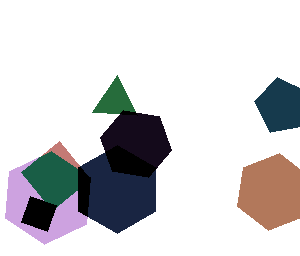

In [16]:
polygon_dataset = Polygons(im_width=300, im_height=256)
img, target = polygon_dataset[490]

im = display_image_and_boxes(img)
display(im)

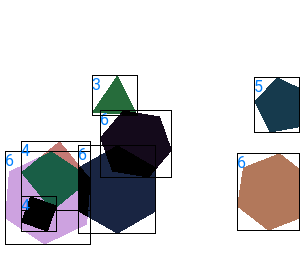

In [20]:
polygon_dataset = Polygons(im_width=300, im_height=256)
img, target = polygon_dataset[490]

im = display_image_and_boxes(img, target)
display(im)

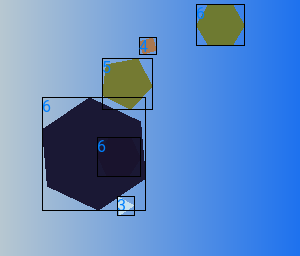

In [21]:
polygon_ds_with_bg = Polygons(im_width=300, im_height=256, background=True)
img, target = polygon_ds_with_bg[4921]

im = display_image_and_boxes(img, target)
display(im)

# **Other**

## **Image from URL**

In [4]:
!pip install --upgrade pillow

Requirement already up-to-date: pillow in /usr/local/lib/python3.7/dist-packages (8.2.0)


In [5]:
import numpy as np
import torch
import os  #to apply font
from PIL import Image, ImageDraw, ImageFont
from urllib.request import urlopen

In [6]:
def display_image_and_boxes(image, target=None, category_names=None):
    ''' 
    image: tensor
    target: dict
    category_names: list mapping class label (int) to class name (str)
    
    '''

    # Convert tensor to image and draw it.
    np_img = (image.permute(1,2,0).cpu().numpy() * 255).astype('uint8')
    im = Image.fromarray(np_img)
    draw = ImageDraw.Draw(im)

    if target:
        # Make sure the required font is available
        if not os.path.isfile('Roboto-Regular.ttf'):
            !wget https://github.com/jerpint/ivado-mila-dl-school-2019-vancouver/raw/dlschool21/assests/Roboto-Regular.ttf
        font = ImageFont.truetype(font='Roboto-Regular.ttf', size=16)

        # Draw each bounding box in the target
        for box, label in zip(target['boxes'], target['labels']):
            box = box.detach().cpu().numpy()
            draw.rectangle(box, outline='black')
            label_str =  category_names[label.cpu().numpy()] if category_names else str(label.cpu().numpy()+2)
            draw.text((box[0], box[1]), label_str, fill=(0,128,256,256), font=font)
    return im

def URL_to_tensor(URL):
    '''
    Convert an image URL to a pytorch tensor.

    Reorders the image axes so that channel is the first dimension and normalizes 
    channels to be in range [0,1].

    input
    -----
    URL (str): URL of the image to be processed

    returns
    -------
    img_tensor (list): list containing the image as a torch.tensor()
    '''
    
    img = Image.open(urlopen(URL)) # Load image
    img_tensor = torch.as_tensor(np.array(img) / 255) # Normalize input to [0, 1]
    img_tensor = img_tensor.permute(2, 0, 1).float() # Reorder image axes to channel first
    return [img_tensor]

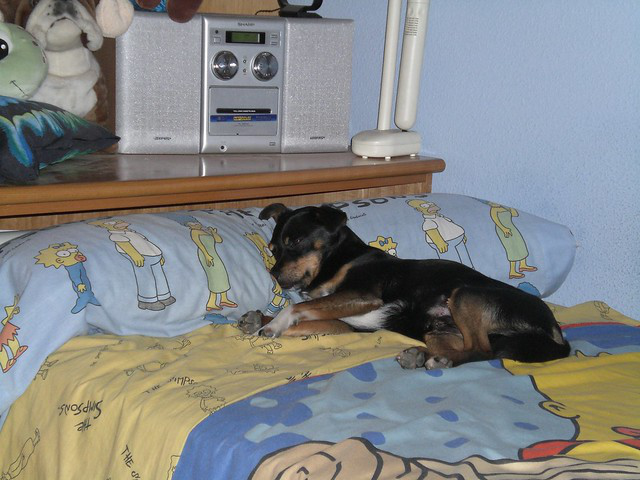

In [7]:
# Download sample image and convert to tensor
URL = 'http://farm3.staticflickr.com/2462/3889476537_9e1a7c6af4_z.jpg'
img_tensors = URL_to_tensor(URL)

# Display image along with model prediction
im = display_image_and_boxes(img_tensors[0])
display(im)